# Setting up the data frame

In [1]:
import pandas as pd
import numpy as np

# Path of the file to read
titanic_path = './train.csv'

# Read csv data
df = pd.read_csv(titanic_path, index_col='PassengerId')

In [2]:
# Changing display of data frame
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',10)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# For reference
# Same ways to access the same data
df.iloc[[2,3,4,5,6], [2,4,8]]  # Integer location, exclusive: [:3] returns 0, 1 and 2; same with columns
df.loc[3:7, ['Name', 'Age', 'Fare']]  # Inclusive: [:3] return 0, 1, 2 and 3; same with columns
# To see columns data types
# df.dtypes

,Name,Age,Fare
PassengerId,,,
3,"Heikkinen, Miss. Laina",26.0,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
5,"Allen, Mr. William Henry",35.0,8.0500
6,"Moran, Mr. James",NaN,8.4583
7,"McCarthy, Mr. Timothy J",54.0,51.8625


# Observing and preparing data

In [4]:
df['Survived'].value_counts()  # Ammount of passengers that survived

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# Changing numeric values of 'Survived' columns for boolean ones
df['Survived'] = df['Survived'].map({1: True, 0: False})

In [6]:
df['Age'].sort_values().unique()  # To know how many different age are and the range

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [7]:
# Adding new column with passengers grouped by age
# Range goes from 0 (inclusive) to 80, by 10.
df['Age_group'] = pd.cut(df['Age'], bins=[g for g in range(0, 81, 10)], include_lowest=True)

In [8]:
df['Fare'].sort_values().unique()  # To know how many different fares are and the range
# df['Fare'].sort_values().unique().size --> 248 different fares

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [9]:
# Adding new columns to data frame relative to fare groups
# Lower fare: between 0 and 30 (0 inclusive) [groups going up by 2]
# Middle fare: between 30 and 150 (30 inclusive) [groups going up by 15]
# Higher fare: between 150 and 551 (150 inclusive) [groups going up by 50]
df['Fare_group_lower'] = pd.cut(df['Fare'], bins=[g for g in range(0, 30, 2)], include_lowest=True)
df['Fare_group_middle'] = pd.cut(df['Fare'], bins=[g for g in range(30, 150, 15)], include_lowest=True)
df['Fare_group_higher'] = pd.cut(df['Fare'], bins=[g for g in range(150, 551, 50)], include_lowest=True)

In [10]:
# Put all Fare groups in a single column 
# Idea from: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram/39291596
cols = ['Fare_group_lower', 'Fare_group_middle', 'Fare_group_higher']
df['Fare_group'] = df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
# Idea from https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string
df['Fare_group'].replace({'nan': ''}, inplace=True, regex=True)
df['Fare_group'].replace({'': np.nan}, inplace=True)
df['Fare_group'] = df['Fare_group'].astype('category')

In [11]:
# For reference. Checking the passengers that have the highest fare
df[df['Fare_group_higher'].notnull()]['Fare'].sort_values(ascending=False)
# df.loc[680]
# df.loc[738]
# df.loc[259]

# Nota de color: £1 de 1912 puede llegar a ser equivalente a £21.2 hoy en día. 
# Eso significa que la tarifa más alta (£512) equivale a £10,854, o sea, cerca de un millón de pesos argentinos.

PassengerId
680    512.3292
738    512.3292
259    512.3292
439    263.0000
89     263.0000
         ...   
333    153.4625
306    151.5500
298    151.5500
499    151.5500
709    151.5500
Name: Fare, Length: 29, dtype: float64

# Visualizing data

In [12]:
import seaborn as sb
sb.set()

#### Survivors by sex

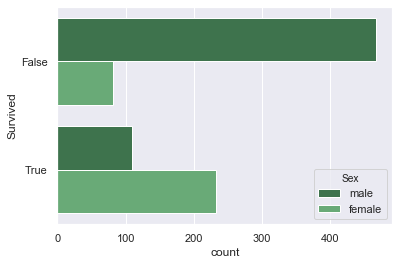

In [13]:
sb.countplot(y='Survived', hue='Sex', data=df, palette="Greens_d")

#### Survivors by age

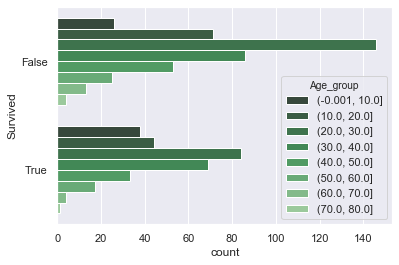

In [14]:
# Idea sacada de: https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
sb.countplot(y='Survived', hue='Age_group', data=df, palette="Greens_d")

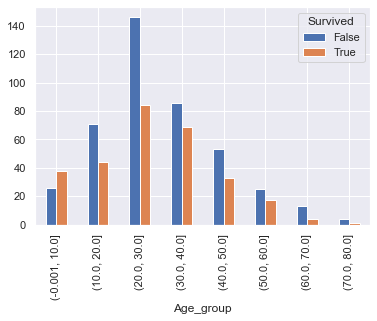

In [15]:
# Idea sacada de: https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
graph=df.groupby(['Age_group','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by sex and age

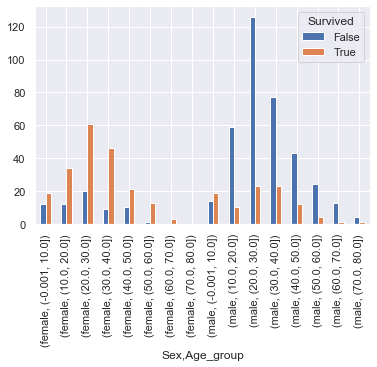

In [16]:
graph = df.groupby(['Sex','Age_group','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by passenger class

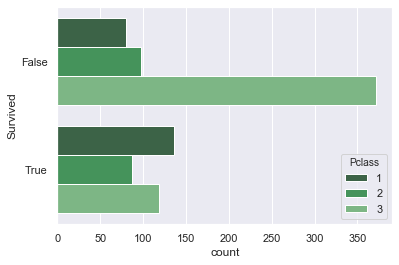

In [17]:
sb.countplot(y='Survived', hue='Pclass', data=df, palette="Greens_d")

#### Survivors by sex and passenger class

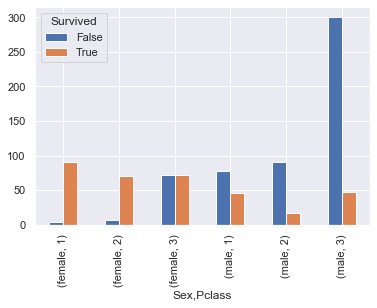

In [18]:
graph = df.groupby(['Sex','Pclass','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by fare groups
This is done in groups due the large amount of different fares (248).

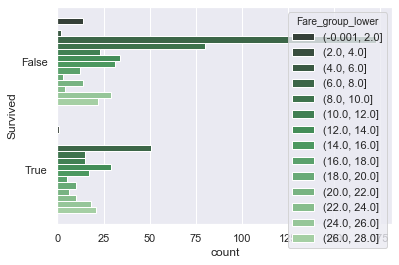

In [19]:
sb.countplot(y='Survived', hue='Fare_group_lower', data=df, palette="Greens_d")

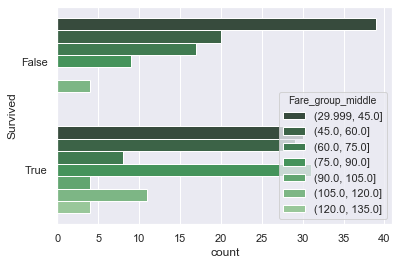

In [20]:
sb.countplot(y='Survived', hue='Fare_group_middle', data=df, palette="Greens_d")

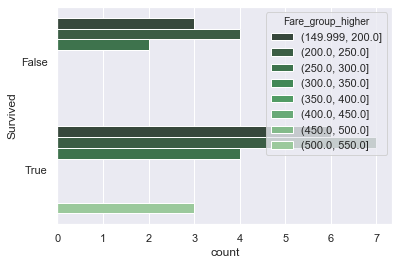

In [21]:
sb.countplot(y='Survived', hue='Fare_group_higher', data=df, palette="Greens_d")

#### Survivors by sex and fare groups 

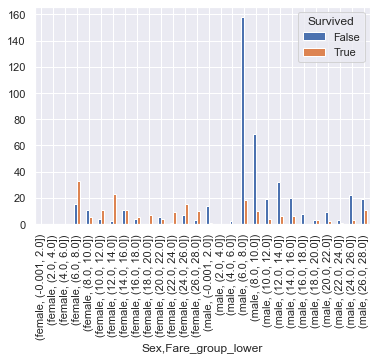

In [22]:
graph=df.groupby(['Sex','Fare_group_lower','Survived']).size().unstack()
graph.plot(kind='bar')

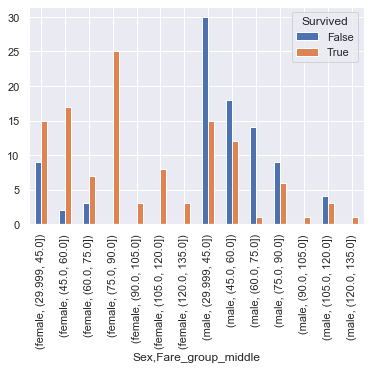

In [23]:
graph=df.groupby(['Sex','Fare_group_middle','Survived']).size().unstack()
graph.plot(kind='bar')

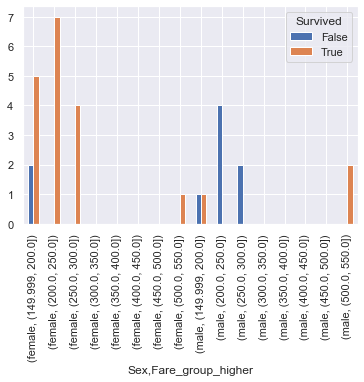

In [24]:
graph=df.groupby(['Sex','Fare_group_higher','Survived']).size().unstack()
graph.plot(kind='bar')

# Conclusions on data visualization

In [25]:
# Ratios
df['Survived'] = df['Survived'].map({True: 1, False: 0})
# Sex survival ratio
sex_ratio = df.groupby("Sex")['Survived'].mean()
# female    0.742038 --> 74% of females survived
# male      0.188908 --> 63% of males survived

# Class survival ratio
class_ratio = df.groupby("Pclass")['Survived'].mean()
# 1    0.629630 --> 63% of first class survived
# 2    0.472826 --> 47% of second class survived
# 3    0.242363 --> 24% of third class survived

# Lower fare survival ratio
total_lower = df[df['Fare_group_lower'].notnull()].size
surv_lower = df[(df['Fare_group_lower'].notnull()) & (df['Survived'] == 1)].size
ratio_lower_surv = surv_lower/total_lower  # 31% of lower fare survived
# Middle fare survival ratio
total_middle = df[df['Fare_group_middle'].notnull()].size
surv_middle = df[(df['Fare_group_middle'].notnull()) & (df['Survived'] == 1)].size
ratio_middle_surv = surv_middle/total_middle  # 56% of middle fare survived
# Higher fare survival ratio
total_higher = df[df['Fare_group_higher'].notnull()].size
surv_higher = df[(df['Fare_group_higher'].notnull()) & (df['Survived'] == 1)].size
ratio_higher_surv = surv_higher/total_higher  # 65% of higher fare survived

# Age survival ratio
total = df.groupby("Age_group")['Survived'].mean()
# (-0.001, 10.0]    0.593750 --> 59%
# (10.0, 20.0]      0.382609 --> 38%
# (20.0, 30.0]      0.365217 --> 36%
# (30.0, 40.0]      0.445161 --> 44%
# (40.0, 50.0]      0.383721 --> 38%
# (50.0, 60.0]      0.404762 --> 40%
# (60.0, 70.0]      0.235294 --> 23%
# (70.0, 80.0]      0.200000 --> 20%

#### Conclusions:

- A male that payed a lower fare for a class 3 has very low probabilities to survive.
- A female that payed a higher fare for a class 1 has very high probabilities to survive.
- Its more probable for a female to survive; the contrary is for a male.
- Its more probable for a class 1 passeger to survive than a class 2, and even more than a class 3.
- Its more probable for someone that payed a higher fare survives than some that payed a middle or, even more, a lower fare.
- Children have high probabilities to survive; the older people have very low chances to survive.
- Middle aged men have very low probabilities to survive. Middle aged women have very high probabilities to survive.

# Preparing data for machine learning

In [26]:
features = ['Survived', 'Sex', 'Age', 'Pclass', 'Fare', 'Fare_group', 'Age_group']
df.dropna(axis='index', how="any", subset=features)

,Survived,Pclass,Name,Sex,Age,SibSp,...,Embarked,Age_group,Fare_group_lower,Fare_group_middle,Fare_group_higher,Fare_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,...,S,"(20.0, 30.0]","(6.0, 8.0]",NaN,NaN,"(6.0, 8.0]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,...,C,"(30.0, 40.0]",NaN,"(60.0, 75.0]",NaN,"(60.0, 75.0]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,...,S,"(20.0, 30.0]","(6.0, 8.0]",NaN,NaN,"(6.0, 8.0]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,...,S,"(30.0, 40.0]",NaN,"(45.0, 60.0]",NaN,"(45.0, 60.0]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,...,S,"(30.0, 40.0]","(8.0, 10.0]",NaN,NaN,"(8.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,...,S,"(20.0, 30.0]","(6.0, 8.0]",NaN,NaN,"(6.0, 8.0]"
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,...,S,"(20.0, 30.0]","(12.0, 14.0]",NaN,NaN,"(12.0, 14.0]"
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,...,S,"(10.0, 20.0]",NaN,"(29.999, 45.0]",NaN,"(29.999, 45.0]"
